<a href="https://colab.research.google.com/github/MANISHA-S-M/AIML-MANISHA/blob/main/aiml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install matplotlib


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Define the stock ticker and the time period
ticker = 'AAPL'  # Change this to the stock you want to analyze
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.876122,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.167595,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.742638,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.400566,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.565216,75.797501,76.110001,74.290001,74.290001,132079200


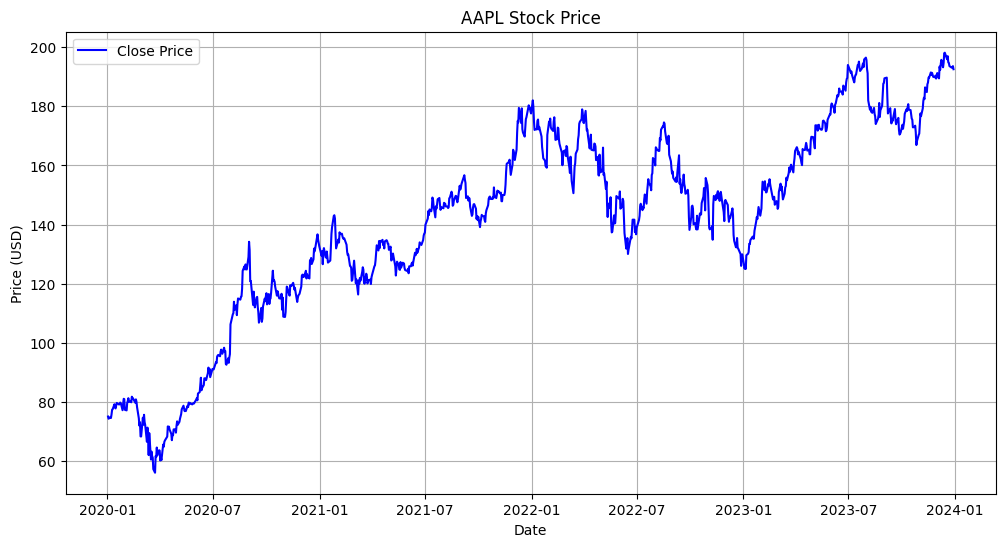

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


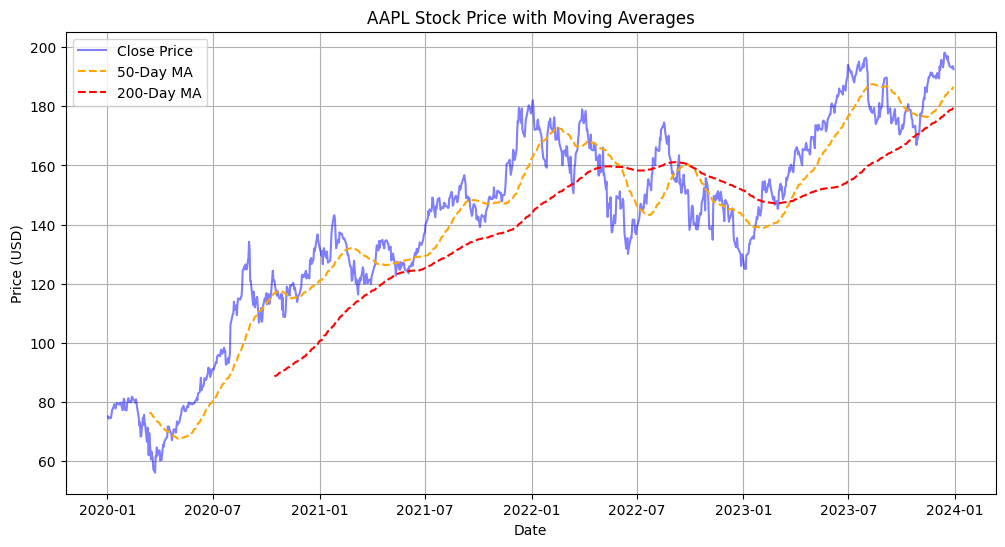

In [5]:
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['MA200'] = data['Close'].rolling(window=200).mean()  # 200-day moving average

# Plot the stock price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['MA50'], label='50-Day MA', color='orange', linestyle='--')
plt.plot(data['MA200'], label='200-Day MA', color='red', linestyle='--')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


<ipython-input-8-05ab7acbdf00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, 0)  # Buy signal


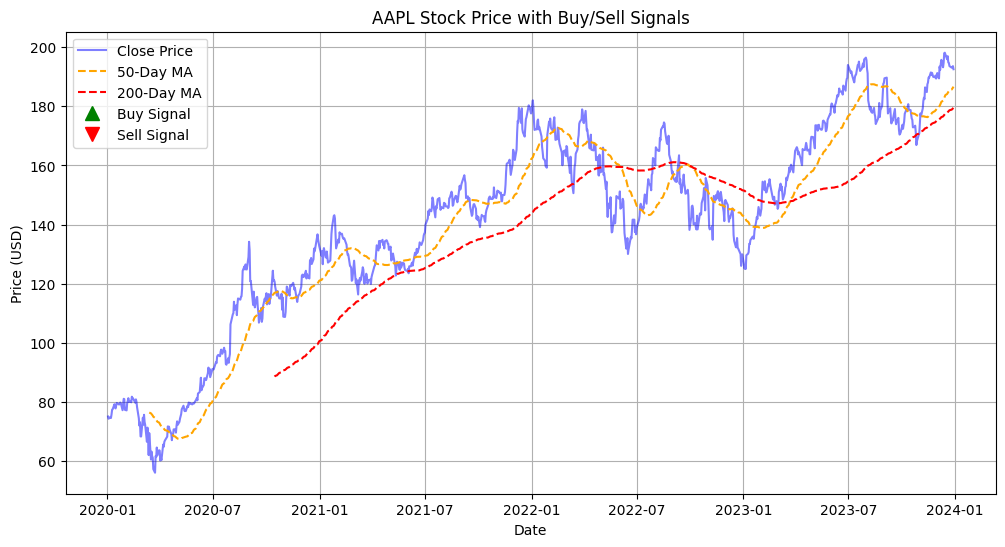

In [8]:
# Detect crossover signals
data['Signal'] = 0
data['Signal'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()

# Visualize the signals
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['MA50'], label='50-Day MA', color='orange', linestyle='--')
plt.plot(data['MA200'], label='200-Day MA', color='red', linestyle='--')

# Plot buy signals
plt.plot(data[data['Position'] == 1].index,
         data['MA50'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index,
         data['MA50'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{ticker} Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [7]:
import numpy as np